In [3]:
import numpy as np
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
# https://turi.com/learn/userguide/clustering/dbscan.html

In [19]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=100, centers=centers, cluster_std=0.4,
                            random_state=0)

In [20]:
X

array([[ 1.06197897,  1.15126501],
       [ 0.74255264, -1.88936126],
       [ 1.02660689,  1.12098876],
       [ 0.55824666, -0.97913397],
       [ 0.817787  , -0.99300834],
       [ 1.61311169,  1.58774351],
       [ 1.07097046,  0.83928763],
       [ 0.74566157, -0.72942668],
       [-0.52848817, -1.07196993],
       [ 0.31749192,  1.78031016],
       [ 1.47521192, -0.87322296],
       [-1.36291935, -0.97922184],
       [-0.7310821 , -0.83701527],
       [ 0.96061899, -1.26539131],
       [ 1.86529438, -0.46538882],
       [ 1.05761743,  1.5817094 ],
       [ 0.97270336, -0.31466291],
       [-0.75436825, -0.63111733],
       [ 1.23063633, -1.0833195 ],
       [-1.27782714, -1.05985382],
       [-1.30796643, -0.78430032],
       [ 0.79567794,  0.52774713],
       [-0.91669001, -0.60934439],
       [-0.83906334, -1.27392404],
       [-0.85745344, -0.71737073],
       [ 1.34577448,  0.70313399],
       [-1.16127078, -0.51102197],
       [ 1.7470232 ,  0.60908885],
       [-1.46605994,

In [31]:
labels_true

array([0, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1])

In [22]:
X = StandardScaler().fit_transform(X) 

In [23]:
X

array([[ 0.72358444,  1.42285727],
       [ 0.40361757, -1.63648322],
       [ 0.6881525 ,  1.39239468],
       [ 0.21899971, -0.72065373],
       [ 0.47897924, -0.73461349],
       [ 1.2756498 ,  1.86202218],
       [ 0.73259114,  1.10895975],
       [ 0.40673176, -0.46940956],
       [-0.86957413, -0.81406108],
       [-0.02216244,  2.05577402],
       [ 1.13751667, -0.61409086],
       [-1.70541734, -0.72074214],
       [-1.07251089, -0.57766033],
       [ 0.62205294, -1.00867291],
       [ 1.52825924, -0.20374662],
       [ 0.71921552,  1.85595093],
       [ 0.63415775, -0.05209304],
       [-1.09583645, -0.37049515],
       [ 0.8925272 , -0.8254805 ],
       [-1.62018115, -0.80187039],
       [-1.65037143, -0.52462094],
       [ 0.45683277,  0.79550181],
       [-1.25843289, -0.34858819],
       [-1.18067486, -1.01725815],
       [-1.19909608, -0.45727941],
       [ 1.00786019,  0.97196813],
       [-1.50342754, -0.24966063],
       [ 1.40978791,  0.87734416],
       [-1.80873247,

In [27]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [28]:

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 2
Estimated number of noise points: 6
Homogeneity: 0.541
Completeness: 0.729
V-measure: 0.621
Adjusted Rand Index: 0.507
Adjusted Mutual Information: 0.532
Silhouette Coefficient: 0.285


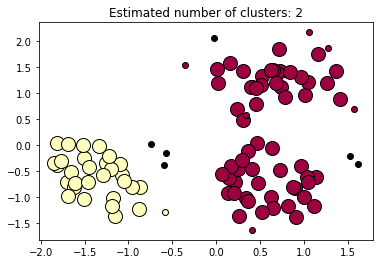

In [29]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()